# Predicting Housing Prices

**Challenge overview:**

Define a rule that determines whether a house is expensive or not.
Write a function that takes a DataFrame of housing data as an input, and based on the rule you defined, outputs a list with predictions about whether a house is expensive or not (1 or 0).
Use Scikit-Learn’s accuracy_score to check how well your rule makes predictions on the test set.

**Dataset variables:**

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

## 1. Data reading & first glance

In [ ]:
import pandas as pd

url = "https://drive.google.com/file/d/17cRRkpEgDN7unpHI7OARVdwbQfQNgtSF/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


data = pd.read_csv(path)
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

The target column (what we want our model to predict) is usually denoted as `y` and we call it a `label`. We will "pop" it out from the rest of the data:

In [ ]:
y = data.pop("Expensive")

As you can see, the target is just a bunch of zeros and ones. 1 means the passenger survived and 0 means they did not survive:

In [ ]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

The "feature vector" (the columns used to predict the target) is denoted as `X`. 

Some of the columns in the original dataset are unique identifiers of each passenger. Unique identifiers are not useful when it comes to finding patterns in the data. So, the first step when building our `X`, the vector of predictor features, is to drop them:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [ ]:
data.head(5)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0


In [ ]:
#X = data.drop(columns=["",""])
X = data.copy()
X.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0


Even if the target (`y`) and the features (`X`) are in two different objects, there is still a very easy mapping between them: the first row in `X` and the first element in `y` both correspond to the first passenger, the second row in `X`and the second element in `y` correspond to the second passenger, and so on.

## 2. Basic Exploration

Just look briefly at the data types of your columns get get an idea of how they look like.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [ ]:
X.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

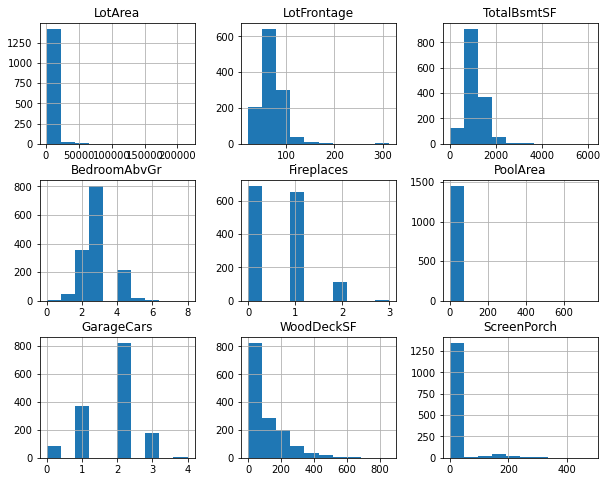

In [ ]:
X.hist(figsize=(10, 8));

## 3. Train-test split

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize. 

Here, we're using the function `train_test_split` to shuffle the observations randomly and create the train and test sets for both the `X` and the `y` objects at the same time, ensuring that they are shuffled the same way:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1216,8930,68.0,0,4,0,0,2,0,0
339,12400,66.0,1215,3,0,0,1,0,234
1057,29959,NaN,973,3,1,0,2,168,0
482,2500,50.0,910,4,1,0,1,0,0
529,32668,NaN,2035,4,2,0,2,0,0


In [ ]:
X_train.shape

(1168, 9)

In [ ]:
y_train.head()

1216    0
339     0
1057    0
482     0
529     0
Name: Expensive, dtype: int64

As you can see from the indices, both the `X` and `y` train sets contain first the passenger in position `854`, then the one in position `381`, etc.

The same applies for the test set:

In [ ]:
X_test.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
854,17920,102.0,1763,3,1,0,2,0,312
381,7200,60.0,1293,2,1,0,2,216,0
816,11425,NaN,1008,2,1,0,1,0,0
577,11777,96.0,1164,3,2,0,2,160,0
35,13418,108.0,1117,4,1,0,3,113,0


In [ ]:
y_test

854     0
381     0
816     0
577     0
35      1
       ..
970     0
598     0
1058    1
1018    0
387     0
Name: Expensive, Length: 292, dtype: int64

## 4. Iteration 0 - An intuition-based model

Machine Learning models should never be the first option to solve any problem. Machine Learning adds complexity to a business, and it should only be implemented if it represents a clear advantage compared to a simple working solution that the company has build following simple rules, common sense or gained expertise. 

Therefore, the first step when solving any problem should be to create a simple (even dumb) working solution and learn to evaluate it. In our example: how well can we predict survivalship with an extremely simple rule?

Let's start by suggesting that everyone died in the Titanic (I mean, the boat just sank in the middle of the ocean!). We will call this "model" the "pessimistic" one, and use it to make predictions for both the train and the test set:

In [ ]:
y_train.value_counts()

0    996
1    172
Name: Expensive, dtype: int64

In [ ]:
len(y_train)

1168

Our predictions for the train set will be just 1168 zeros:

In [ ]:
#pred_pessimistic_train = pd.Series(0, index=range(1168))
pred_pessimistic_train = pd.Series(0, index=range(len(y_train)))

In [ ]:
pred_pessimistic_train

0       0
1       0
2       0
3       0
4       0
       ..
1163    0
1164    0
1165    0
1166    0
1167    0
Length: 1168, dtype: int64

Now: how good are those predictions? We will compare them with the true values and find out the percentage of correctly predicted passengers. This metric is called **accuracy**:

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_pessimistic_train
                                 )

round(train_accuracy, 2)

0.85

Okay, we have about a 85% accuracy in our train set. Let's find out how would have it done in our test set:

In [ ]:
len(y_test)

292

In [ ]:
pred_pessimistic_test = pd.Series(0, index=range(len(y_test)))

In [ ]:
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_pessimistic_test
                               )

round(test_accuracy, 2)

0.85

The performance is pretty much the same. This is typical from simple models: they have a low performance, but the performance stays the same in the data where they were trained and in new data.

A model with a consistent performance between the training and testing set is said to have a **low variance**, which is good. However, a model with a low variance is said to have a **high bias**, which is not so good.

Our model, with high bias, is missing important connections between the features and the target. Another term to describe this is **underfitting**.


Ideally, we want a low variance and a low bias: a high accuracy consistent across the train and the test set.

https://www.bmc.com/blogs/bias-variance-machine-learning